Path found! Number of expansions: 35
Path length (approx.): 10.49
Path: [(10, 5), (10, 6), (10, 7), (11, 8), (12, 9), (13, 10), (12, 11), (11, 12), (10, 13)]


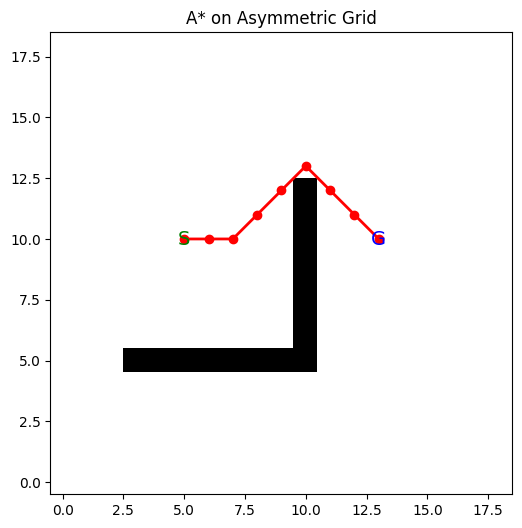

In [4]:
import math
import heapq
import matplotlib.pyplot as plt

def create_asymmetric_grid():
    """
    Returns a 19x19 grid (list of lists) with an 'L' shaped obstacle.
    0 = free cell
    1 = obstacle
    """
    rows, cols = 19, 19
    grid = [[0 for _ in range(cols)] for _ in range(rows)]
    
    # Example L-shape (you can modify these exactly to match your figure’s coordinates)
    # Let's say the top horizontal part is row=5, columns from 3..10
    # And the downward leg is column=10, rows from 5..12
    # NOTE: row=0 is top if we use normal Python indexing
    # Adjust to line up with your diagram’s numbering.
    
    # Horizontal bar (row=5)
    row_h = 5
    for c in range(3, 11):  # columns 3..10
        grid[row_h][c] = 1
        
    # Vertical bar (col=10)
    col_v = 10
    for r in range(5, 13):  # rows 5..12
        grid[r][col_v] = 1

    return grid


def is_valid(r, c, grid):
    """Check whether (r,c) is inside the grid and not an obstacle."""
    rows = len(grid)
    cols = len(grid[0])
    if r < 0 or c < 0 or r >= rows or c >= cols:
        return False
    return (grid[r][c] == 0)

def euclidean_dist(cell_a, cell_b):
    (r1, c1), (r2, c2) = cell_a, cell_b
    return math.sqrt((r1 - r2)**2 + (c1 - c2)**2)

def a_star_search(start, goal, grid):
    """
    A* on an 8-connected grid with Euclidean distance as the heuristic.
    :param start: (row, col) for start cell
    :param goal: (row, col) for goal cell
    :param grid: 2D array with 0=free, 1=obstacle
    :return: path (list of (r,c)), number_expanded
    """
    # 8-connected moves: (dr,dc,cost)
    neighbors = [
        (-1,  0, 1.0),   # up
        ( 1,  0, 1.0),   # down
        ( 0, -1, 1.0),   # left
        ( 0,  1, 1.0),   # right
        (-1, -1, math.sqrt(2)),  # up-left
        (-1,  1, math.sqrt(2)),  # up-right
        ( 1, -1, math.sqrt(2)),  # down-left
        ( 1,  1, math.sqrt(2))   # down-right
    ]
    
    open_list = []
    heapq.heappush(open_list, (0, start))  # (f-value, cell)
    
    came_from = {}
    g_cost = {start: 0.0}  # cost-to-come
    f_cost = {start: euclidean_dist(start, goal)}  # g + h
    
    closed_set = set()
    expansions = 0
    
    while open_list:
        # Pop the lowest f-value cell
        _, current = heapq.heappop(open_list)
        
        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, expansions
        
        if current in closed_set:
            continue
        closed_set.add(current)
        expansions += 1
        
        (r, c) = current
        for (dr, dc, cost_move) in neighbors:
            nr, nc = r + dr, c + dc
            if not is_valid(nr, nc, grid):
                continue
            
            new_g = g_cost[current] + cost_move
            if (nr, nc) not in g_cost or new_g < g_cost[(nr, nc)]:
                g_cost[(nr, nc)] = new_g
                f_cost[(nr, nc)] = new_g + euclidean_dist((nr, nc), goal)
                came_from[(nr, nc)] = current
                heapq.heappush(open_list, (f_cost[(nr, nc)], (nr, nc)))
    
    # If no path is found:
    return None, expansions


def plot_grid_path(grid, path, start, goal, title="A* Path on Asymmetric Grid"):
    """
    Plots:
    - Obstacle cells in black
    - Free cells in white
    - Path in red with markers
    - Start (S) in green text
    - Goal (G) in blue text
    """
    rows = len(grid)
    cols = len(grid[0])

    plt.figure(figsize=(6,6))
    
    # Plot the grid. Here we map 0 -> white, 1 -> black
    plt.imshow(grid, cmap='binary', origin='upper')
    
    # Plot path cells in red
    if path is not None:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        plt.plot(path_cols, path_rows, color='red', linewidth=2, marker='o')
    
    # Mark start, goal
    plt.text(start[1], start[0], 'S', color='green', fontsize=14,
             horizontalalignment='center', verticalalignment='center')
    plt.text(goal[1],  goal[0],  'G', color='blue',  fontsize=14,
             horizontalalignment='center', verticalalignment='center')
    
    plt.title(title)
    # Invert y-axis if you prefer the first row at top
    plt.gca().invert_yaxis()
    plt.show()

def main():
    # Create the grid
    grid = create_asymmetric_grid()
    
    # Define start and goal. 
    # Adjust these to match your figure's labeling or your desired test.
    start = (10, 5)  # row=10, col=5
    goal  = (10, 13) # row=10, col=13
    
    path, expanded = a_star_search(start, goal, grid)
    
    if path is None:
        print("No path found!")
    else:
        # Sum up the path length in a straightforward way:
        # (We can recalculate the path cost or re-use the g_cost from the final node.)
        total_length = 0.0
        for i in range(len(path) - 1):
            total_length += euclidean_dist(path[i], path[i+1])
        
        print(f"Path found! Number of expansions: {expanded}")
        print(f"Path length (approx.): {total_length:.2f}")
        print("Path:", path)
    
    # Plot the result
    plot_grid_path(grid, path, start, goal, title="A* on Asymmetric Grid")

if __name__ == "__main__":
    main()



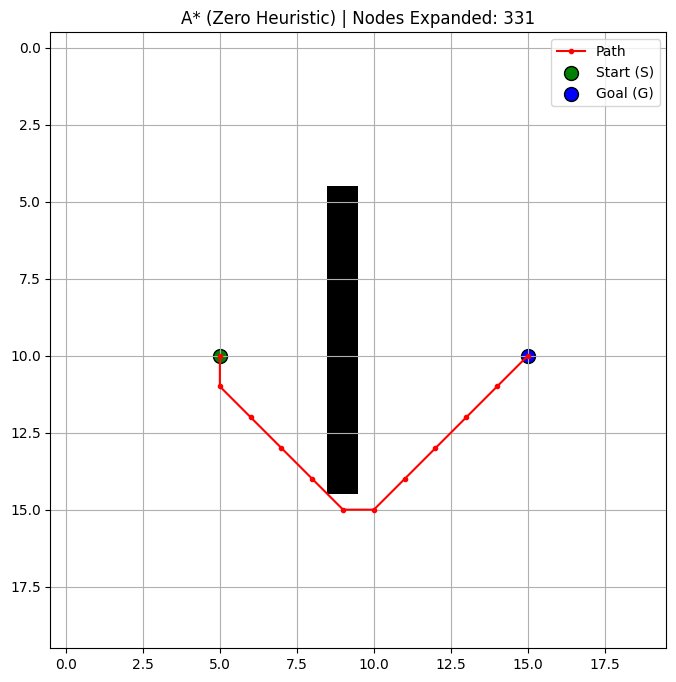

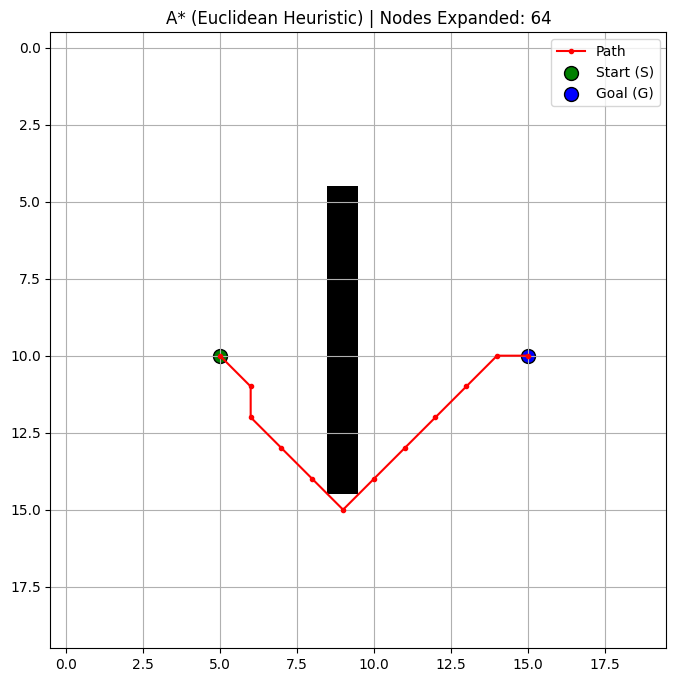

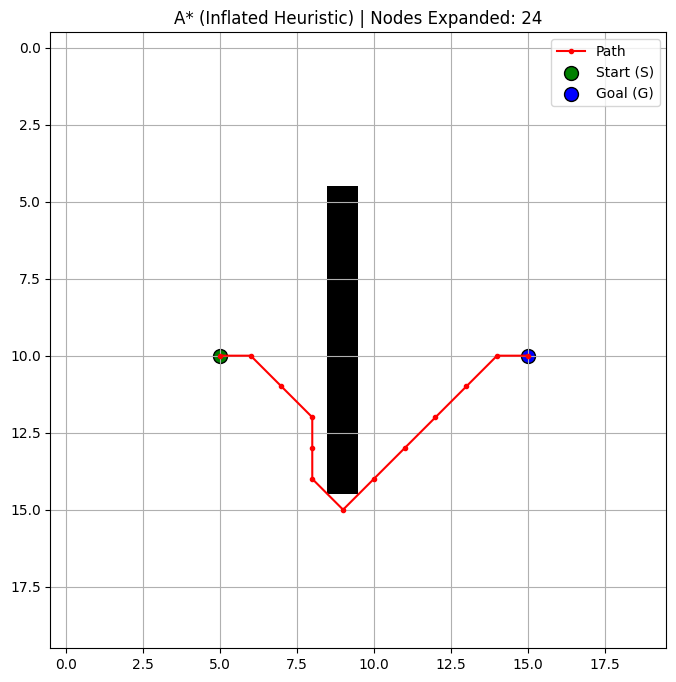

In [3]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Define the 8-connected movement directions
MOVES = [
    (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, Down, Left, Right
    (-1, -1), (-1, 1), (1, -1), (1, 1) # Diagonals
]

def euclidean_distance(a, b):
    """Compute Euclidean distance between two points."""
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star(grid, start, goal, heuristic='euclidean', eta=100):
    """
    A* search algorithm implementation on an 8-connected grid.
    
    Parameters:
        grid: 2D numpy array (1 = obstacle, 0 = free space)
        start: (x, y) coordinates of start
        goal: (x, y) coordinates of goal
        heuristic: Type of heuristic ('zero', 'euclidean', 'inflated')
        eta: Inflation factor for heuristic (only used when heuristic='inflated')
    
    Returns:
        path: List of (x, y) points from start to goal
        expanded: Number of nodes expanded
    """
    rows, cols = grid.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: 0}

    expanded_nodes = 0

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1], expanded_nodes
        
        expanded_nodes += 1
        
        for move in MOVES:
            neighbor = (current[0] + move[0], current[1] + move[1])

            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0):
                tentative_g_score = g_score[current] + euclidean_distance(current, neighbor)
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    if heuristic == 'zero':
                        h = 0
                    elif heuristic == 'euclidean':
                        h = euclidean_distance(neighbor, goal)
                    elif heuristic == 'inflated':
                        h = eta * euclidean_distance(neighbor, goal)
                    else:
                        raise ValueError("Invalid heuristic type")
                    
                    f_score[neighbor] = g_score[neighbor] + h
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
                    came_from[neighbor] = current

    return None, expanded_nodes  # No path found

def plot_grid(grid, path=None, start=None, goal=None, title="A* Path Planning"):
    """Visualizes the grid, obstacles, start, goal, and path."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap="gray_r", origin="upper")
    
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', color='red', markersize=3, label="Path")

    if start:
        plt.scatter(start[1], start[0], color='green', s=100, label="Start (S)", edgecolors='black')
    
    if goal:
        plt.scatter(goal[1], goal[0], color='blue', s=100, label="Goal (G)", edgecolors='black')
    
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Define the grid world for Figure 2(a)
grid_world_a = np.zeros((20, 20), dtype=int)
grid_world_a[5:15, 9] = 1  # Vertical obstacle

# Define start and goal positions for Figure 2(a)
start_a = (10, 5)
goal_a = (10, 15)

# Run A* search for different heuristics
results = {}
for heuristic in ['zero', 'euclidean', 'inflated']:
    path, expanded = a_star(grid_world_a, start_a, goal_a, heuristic)
    results[heuristic] = (path, expanded)

# Plot results for Figure 2(a)
for heuristic, (path, expanded) in results.items():
    plot_grid(grid_world_a, path, start_a, goal_a, title=f"A* ({heuristic.capitalize()} Heuristic) | Nodes Expanded: {expanded}")


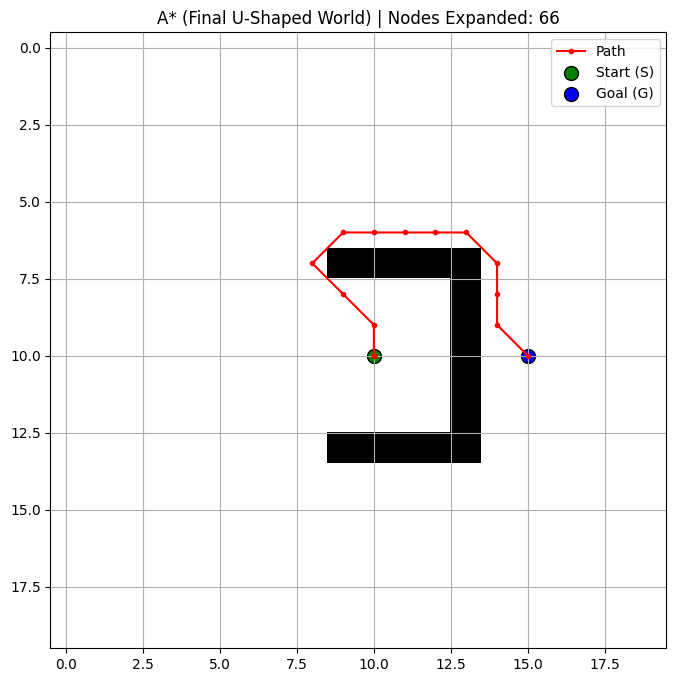

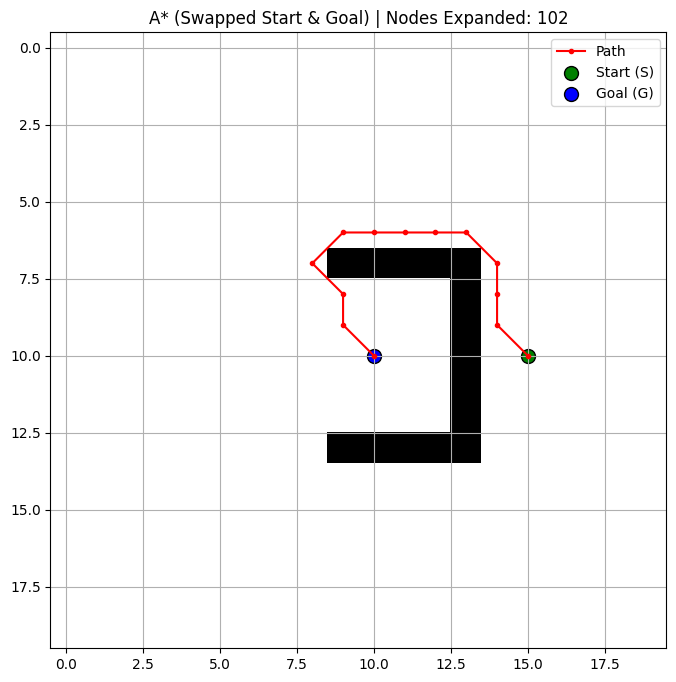

In [5]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Define the 8-connected movement directions
MOVES = [
    (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, Down, Left, Right
    (-1, -1), (-1, 1), (1, -1), (1, 1) # Diagonals
]

def euclidean_distance(a, b):
    """Compute Euclidean distance between two points."""
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star(grid, start, goal, heuristic='euclidean', eta=100):
    """
    A* search algorithm implementation on an 8-connected grid.
    
    Parameters:
        grid: 2D numpy array (1 = obstacle, 0 = free space)
        start: (x, y) coordinates of start
        goal: (x, y) coordinates of goal
        heuristic: Type of heuristic ('zero', 'euclidean', 'inflated')
        eta: Inflation factor for heuristic (only used when heuristic='inflated')
    
    Returns:
        path: List of (x, y) points from start to goal
        expanded: Number of nodes expanded
    """
    rows, cols = grid.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    f_score = {start: 0}

    expanded_nodes = 0

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            return path[::-1], expanded_nodes
        
        expanded_nodes += 1
        
        for move in MOVES:
            neighbor = (current[0] + move[0], current[1] + move[1])

            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0):
                tentative_g_score = g_score[current] + euclidean_distance(current, neighbor)
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    if heuristic == 'zero':
                        h = 0
                    elif heuristic == 'euclidean':
                        h = euclidean_distance(neighbor, goal)
                    elif heuristic == 'inflated':
                        h = eta * euclidean_distance(neighbor, goal)
                    else:
                        raise ValueError("Invalid heuristic type")
                    
                    f_score[neighbor] = g_score[neighbor] + h
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
                    came_from[neighbor] = current

    return None, expanded_nodes  # No path found

def plot_grid(grid, path=None, start=None, goal=None, title="A* Path Planning"):
    """Visualizes the grid, obstacles, start, goal, and path."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap="gray_r", origin="upper")
    
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker='o', color='red', markersize=3, label="Path")

    if start:
        plt.scatter(start[1], start[0], color='green', s=100, label="Start (S)", edgecolors='black')
    
    if goal:
        plt.scatter(goal[1], goal[0], color='blue', s=100, label="Goal (G)", edgecolors='black')
    
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Define the final corrected asymmetric grid world with a left-right U-shaped obstacle
grid_world_final = np.zeros((20, 20), dtype=int)

grid_world_final[7, 9:14] = 1  # Top horizontal wall
grid_world_final[7:13, 13] = 1  # Right vertical wall
grid_world_final[13, 9:14] = 1  # Bottom horizontal wall

# Define the corrected start and goal positions
start_final = (10, 10)  # Start position as per the first diagram
goal_final = (10, 15)   # Goal remains the same

# Run A* search with Euclidean heuristic in the final corrected world
path_final, expanded_final = a_star(grid_world_final, start_final, goal_final, 'euclidean')

# Swap start and goal positions and rerun
path_final_swapped, expanded_final_swapped = a_star(grid_world_final, goal_final, start_final, 'euclidean')

# Plot results for the final corrected U-shaped grid world
plot_grid(grid_world_final, path_final, start_final, goal_final, title=f"A* (Final U-Shaped World) | Nodes Expanded: {expanded_final}")
plot_grid(grid_world_final, path_final_swapped, goal_final, start_final, title=f"A* (Swapped Start & Goal) | Nodes Expanded: {expanded_final_swapped}")


/tmp/ipykernel_2497114/1236695376.py:38: RuntimeWarning: invalid value encountered in divide
  vec = vec / np.linalg.norm(vec) * self.step_size
/tmp/ipykernel_2497114/1236695376.py:39: RuntimeWarning: invalid value encountered in cast
  q_new = tuple(np.round(np.array(q_nearest) + vec).astype(int))


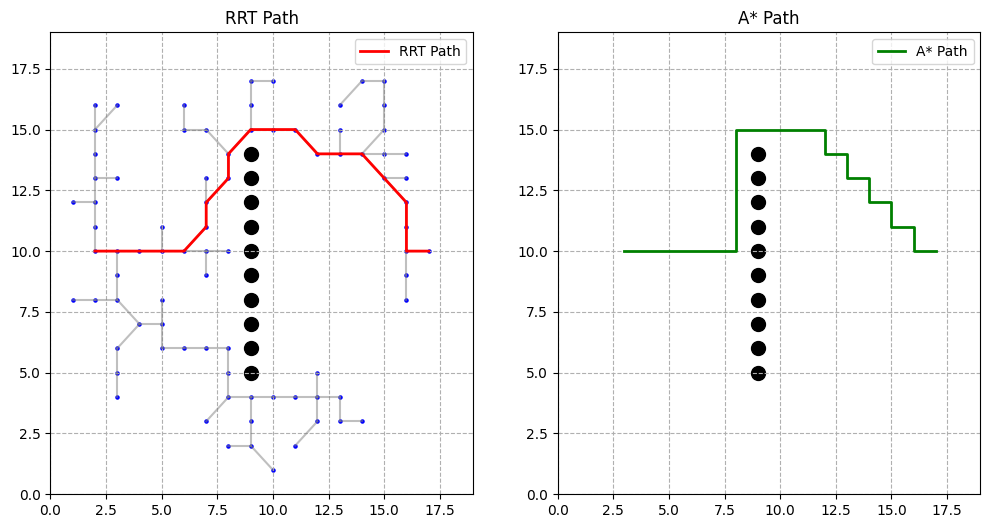

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Define environment parameters
width, height = 19, 19  # Continuous space dimensions
start = (2, 10)
goal = (17, 10)
obstacle_x = 9  # Vertical obstacle at x=9
obstacle_range = range(5, 15)  # Obstacle covers y from 5 to 14

# Function to check if a point is in an obstacle
def is_in_obstacle(x, y):
    return x == obstacle_x and y in obstacle_range

# RRT Algorithm Implementation
class RRT:
    def __init__(self, start, goal, max_iter=1000, step_size=1):
        self.start = start
        self.goal = goal
        self.max_iter = max_iter
        self.step_size = step_size
        self.tree = nx.Graph()
        self.tree.add_node(start)

    def sample(self):
        if np.random.rand() < 0.1:  # Bias towards goal
            return self.goal
        else:
            return (np.random.randint(1, width), np.random.randint(1, height))

    def nearest(self, q_rand):
        return min(self.tree.nodes, key=lambda q: np.linalg.norm(np.array(q) - np.array(q_rand)))

    def steer(self, q_nearest, q_rand):
        vec = np.array(q_rand) - np.array(q_nearest)
        vec = vec / np.linalg.norm(vec) * self.step_size
        q_new = tuple(np.round(np.array(q_nearest) + vec).astype(int))
        return q_new if 1 <= q_new[0] < width and 1 <= q_new[1] < height and not is_in_obstacle(*q_new) else None

    def find_path(self):
        for _ in range(self.max_iter):
            q_rand = self.sample()
            q_nearest = self.nearest(q_rand)
            q_new = self.steer(q_nearest, q_rand)
            if q_new and q_new not in self.tree:
                self.tree.add_edge(q_nearest, q_new)
                if np.linalg.norm(np.array(q_new) - np.array(self.goal)) < self.step_size:
                    self.tree.add_edge(q_new, self.goal)
                    return list(nx.shortest_path(self.tree, source=self.start, target=self.goal))
        return None

# A* Algorithm Implementation
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star(start, goal):
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    cost_so_far = {start: 0}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 1 <= neighbor[0] < width and 1 <= neighbor[1] < height and not is_in_obstacle(*neighbor):
                new_cost = cost_so_far[current] + 1
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic(goal, neighbor)
                    heapq.heappush(open_list, (priority, neighbor))
                    came_from[neighbor] = current
    return None

# Run RRT and A* Algorithms
rrt = RRT(start, goal)
rrt_path = rrt.find_path()
a_star_path = a_star(start, goal)

# Plot Results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot RRT Path
ax[0].set_title("RRT Path")
ax[0].set_xlim(0, width)
ax[0].set_ylim(0, height)
ax[0].grid(True, linestyle="--")
for node in rrt.tree.nodes:
    ax[0].scatter(*node, color='blue', s=5)
for edge in rrt.tree.edges:
    ax[0].plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], color='gray', alpha=0.5)
if rrt_path:
    rrt_x, rrt_y = zip(*rrt_path)
    ax[0].plot(rrt_x, rrt_y, color='red', linewidth=2, label="RRT Path")

# Plot A* Path
ax[1].set_title("A* Path")
ax[1].set_xlim(0, width)
ax[1].set_ylim(0, height)
ax[1].grid(True, linestyle="--")
if a_star_path:
    a_star_x, a_star_y = zip(*a_star_path)
    ax[1].plot(a_star_x, a_star_y, color='green', linewidth=2, label="A* Path")

# Draw obstacles
for y in obstacle_range:
    ax[0].scatter(obstacle_x, y, color='black', s=100)
    ax[1].scatter(obstacle_x, y, color='black', s=100)

ax[0].legend()
ax[1].legend()
plt.show()




